# Questão 3

Para o estudo dessa questão, foi necessário fazer um classificação com rede neural, para isso foi usado a linguagem de programação Python. Esse estudo foi dividido em 2 partes, a primeira "Análise de Outliers" e a segunda "Análise de Atributos". Para isso foi necessário o uso das bibliotecas Tensor Flow, Keras, Numpy, Pandas e Pyplot.     

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas

Foi realizado a leitura do arquivo `avila-tr.csv`, colocando um label em cada um dos atributos com o uso do array `names` e salvando na variavel `dataset`, usando a biblioteca Pandas. Foi salvo o valor de cada classificação possível para uso posterior, no array `class_names`. E depois a transformação do `dataset` em array usando a biblioteca Numpy.

In [2]:
url = "avila-tr.csv"
names = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Class']
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'W', 'X', 'Y']
dataset = pandas.read_csv(url, names=names)
dataset = np.array(dataset.values)

Em seguida foi realizado a transformação de todos os valores salvos no atributo `Class`, pelos indices de suas possições no array `class_names`. Como é possível ver no output.

In [3]:
print(dataset[:, 10])
j = 0
dataset_Y = dataset[:, 10]
for y in dataset_Y:
    for i in range(12):
        if(y == class_names[i]):
            dataset_Y[j] = i
            j += 1
dataset[:, 10] = np.array(dataset_Y)
print(dataset[:, 10])

['A' 'A' 'A' ... 'A' 'E' 'X']
[0 0 0 ... 0 4 10]


## Análise de Outliers
### Model_0

Então aqui começa a análise de Outliers. Com o resultado do BoxPlot abaixo, é posível notar que todos os 10 atributos possuem outliers. Porém não foi realizado a remoção dos mesmos, pois primeiro foi testado o resultado da acurácia sem a remoção deles.

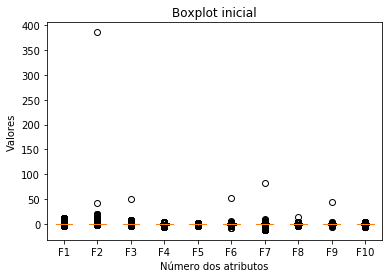

In [4]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot inicial')
ax1.set_xlabel("Número dos atributos")
ax1.set_ylabel("Valores")
ax1.boxplot(dataset[:, :10], labels=names[:10], showfliers=True)
plt.show()

Podemos ver que o 'dataset' foi dividido em 80% treinamento e validação e 20% teste.

In [5]:
train_size = (len(dataset) * 80)//100
print(train_size)
X_0_train = dataset[:train_size, :10]
X_0_test = dataset[train_size:, :10]
Y_0_train = dataset[:train_size, 10]
Y_0_test = dataset[train_size:, 10]

8344


Para realizar o treinamento do modelo da rede neural, foram usadas 2 camadas com 1024 "neurônios" cada uma e a camada de saida com 12 possiveis classificações. As duas primeiras camadas utilizaram a função de ativação "Rectified Linear Unit(ReLU)" e ultima a função de ativação "SoftMax". Para a otimização do treinamento foi utilizado o otimizador do algoritmo "Adam" e a metrica de avaliação acurácia e o teste de perca de aprendizagem `sparse_categorical_crossentropy`. E dos 100% das intâncias de treinamento e validação, 25% foi utilizado para validação, ou seja, 20% do total da base de dados. Esse modelo realiza 5 épocas.

Esse mesmo modelo foi escolhido através de testes, mudando seus parâmetros, visando a melhor acurácia no treinamento. E então chegamos a esse modelo, na qual também serão usados os mesmo paramêtros para testes futuros.

Podemos analizar que no `modelo_0` houve "overfitting", pois época 5 a acurácia durante o treinamento, '0.7539', é maior do que acurácia durante a validação, '0.7498'

In [6]:
model_0 = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.softmax)
])
model_0.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_0_history = model_0.fit(X_0_train, Y_0_train, epochs=5, validation_split=0.25)

Train on 6258 samples, validate on 2086 samples
Epoch 1/5
6258/6258 [==============================] - 3s 422us/step - loss: 1.2540 - acc: 0.5919 - val_loss: 1.0291 - val_acc: 0.6409
Epoch 2/5
6258/6258 [==============================] - 2s 388us/step - loss: 0.9143 - acc: 0.6796 - val_loss: 0.8458 - val_acc: 0.6874
Epoch 3/5
6258/6258 [==============================] - 2s 367us/step - loss: 0.8003 - acc: 0.7082 - val_loss: 0.7683 - val_acc: 0.7205
Epoch 4/5
6258/6258 [==============================] - 2s 347us/step - loss: 0.7257 - acc: 0.7344 - val_loss: 0.7197 - val_acc: 0.7354
Epoch 5/5
6258/6258 [==============================] - 2s 352us/step - loss: 0.6612 - acc: 0.7539 - val_loss: 0.6510 - val_acc: 0.7498


-------------------------------------------------------------------------------------------------------------------------------
### Model_1
Em seguida foi realizado a 1º remoção de Outliers da base de dados.

Para realizar isso foi feito o cálculo da média e do desvio padrão de cada um dos atributos, com isso eliminou-se todas as instâncias que não estão dentro da soma e da subitração entre a média e o desvio padrão, em cada um dos atributos. Dessa forma sobraram 7995 instâncias. E foi realizado o Boxplot após a 1º remoção de outliers. Como pode-se observar abaixo.

Podemos observar, que no primeiro Boxplot a instância com maior valor possui o valor perto de 400, e agora a instância com maior valor possui valor próximo de 7, então a remoção de outliers foi um sucesso.

In [7]:
mean = np.mean(dataset[:, :10], axis=0)
sd = np.std(dataset[:, :10], axis=0, dtype=np.float64)
for i in range(10):
    dataset = [x for x in dataset if (x[i] > mean[i] - 2 * sd[i])]
    dataset = [x for x in dataset if (x[i] < mean[i] + 2 * sd[i])]
    dataset = np.array(dataset)
    print(dataset.shape)

(9898, 11)
(9878, 11)
(9160, 11)
(8919, 11)
(8889, 11)
(8646, 11)
(8462, 11)
(8195, 11)
(8077, 11)
(7995, 11)


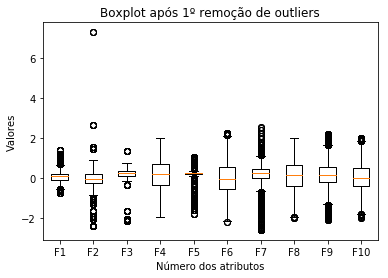

In [8]:
fig2, ax2 = plt.subplots()
ax2.set_title('Boxplot após 1º remoção de outliers')
ax2.set_xlabel("Número dos atributos")
ax2.set_ylabel("Valores")
ax2.boxplot(dataset[:, :10], labels=names[:10], showfliers=True)
plt.show()

Então, foi dividido as instâncias usadas para treinameto e validação e para teste, igual à anteriormente.

Como foi mencionado acima o modelo abaixo, que será usado para verificar a acurária, possui os mesmos parâmetros do modelo anterior. Contudo não pode-se usar a mesma variavel que estava armazenando o modelo antigo, ou seja, `model_0`, se usasemos acabaria causando um "overfitting" do modelo, pois estariamos usando as mesmas instâncias para treinar o modelo, previamente treinado.

Também podemos observar que com menos outliers, ainda ocorreu um "overfitting" entre a época 2 e 3, obersando a acurácia entre a validação e o treinamento.

In [9]:
train_size = (len(dataset) * 80)//100
print(train_size)
X_1_train = dataset[:train_size, :10]
X_1_test = dataset[train_size:, :10]
Y_1_train = dataset[:train_size, 10]
Y_1_test = dataset[train_size:, 10]

6396


In [10]:
model_1 = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.softmax)
])
model_1.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_1_history = model_1.fit(X_1_train, Y_1_train, epochs=5, validation_split=0.25)

Train on 4797 samples, validate on 1599 samples
Epoch 1/5
4797/4797 [==============================] - 2s 460us/step - loss: 1.1014 - acc: 0.6106 - val_loss: 0.8503 - val_acc: 0.6898
Epoch 2/5
4797/4797 [==============================] - 2s 358us/step - loss: 0.7723 - acc: 0.6956 - val_loss: 0.7657 - val_acc: 0.7029
Epoch 3/5
4797/4797 [==============================] - 2s 360us/step - loss: 0.6853 - acc: 0.7275 - val_loss: 0.7414 - val_acc: 0.7092
Epoch 4/5
4797/4797 [==============================] - 2s 391us/step - loss: 0.6280 - acc: 0.7469 - val_loss: 0.6513 - val_acc: 0.7248
Epoch 5/5
4797/4797 [==============================] - 2s 386us/step - loss: 0.5699 - acc: 0.7705 - val_loss: 0.6205 - val_acc: 0.7430


-------------
### Model_2
Em seguida foi realizado a 2º remoção de Outliers da base de dados.

Dessa forma sobraram apenas 5377 instâncias, quase metade das instâncias da base original foi removida. E foi realizado o Boxplot após a 2º remoção de outliers. Como pode-se observar abaixo.

Podemos observar, que nesse Boxplot os atributos `F4`, `F6`, `F8` e `F10`, não possuem mais outliers.

In [11]:
mean = np.mean(dataset[:, :10], axis=0)
sd = np.std(dataset[:, :10], axis=0, dtype=np.float64)
for i in range(10):
    dataset = [x for x in dataset if (x[i] > mean[i] - 2 * sd[i])]
    dataset = [x for x in dataset if (x[i] < mean[i] + 2 * sd[i])]
    dataset = np.array(dataset)
    print(dataset.shape)

(7559, 11)
(7309, 11)
(7211, 11)
(6919, 11)
(6510, 11)
(6254, 11)
(5833, 11)
(5616, 11)
(5429, 11)
(5377, 11)


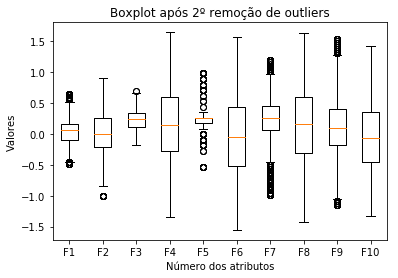

In [12]:
fig3, ax3 = plt.subplots()
ax3.set_title('Boxplot após 2º remoção de outliers')
ax3.set_xlabel("Número dos atributos")
ax3.set_ylabel("Valores")
ax3.boxplot(dataset[:, :10], labels=names[:10], showfliers=True)
plt.show()

Novamente, foi dividido as instâncias usadas para treinameto e validação e para teste.

Usaremos um modelo diferente, porém com os mesmo parâmetros, `model_2`, por causa dos motivos, previamente, mencionados.

Obersando o resultado do treinamento, podemos ver que também houve "overfitting", porém dessa vez foi entre as épocas 3 e 4.

In [13]:
train_size = (len(dataset) * 80)//100
print(train_size)
X_2_train = dataset[:train_size, :10]
X_2_test = dataset[train_size:, :10]
Y_2_train = dataset[:train_size, 10]
Y_2_test = dataset[train_size:, 10]

4301


In [14]:
model_2 = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.softmax)
])
model_2.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_2_history = model_2.fit(X_2_train, Y_2_train, epochs=5, validation_split=0.25)

Train on 3225 samples, validate on 1076 samples
Epoch 1/5
3225/3225 [==============================] - 2s 483us/step - loss: 1.2100 - acc: 0.5684 - val_loss: 0.9755 - val_acc: 0.6180
Epoch 2/5
3225/3225 [==============================] - 1s 408us/step - loss: 0.8688 - acc: 0.6598 - val_loss: 0.8170 - val_acc: 0.6840
Epoch 3/5
3225/3225 [==============================] - 2s 474us/step - loss: 0.7776 - acc: 0.6788 - val_loss: 0.7488 - val_acc: 0.6924
Epoch 4/5
3225/3225 [==============================] - 2s 482us/step - loss: 0.7068 - acc: 0.7085 - val_loss: 0.7280 - val_acc: 0.7063
Epoch 5/5
3225/3225 [==============================] - 1s 373us/step - loss: 0.6665 - acc: 0.7194 - val_loss: 0.6997 - val_acc: 0.6952


-----------
### Model_3
Mais uma vez, foi realizado a 3º remoção de Outliers da base de dados.

Dessa forma sobraram apenas 3784 instâncias. E foi realizado o Boxplot após a 3º remoção de outliers. Como pode-se observar abaixo.

Podemos observar, que nesse Boxplot somente o atributo `F5` possue outliers.

In [15]:
mean = np.mean(dataset[:, :10], axis=0)
sd = np.std(dataset[:, :10], axis=0, dtype=np.float64)
for i in range(10):
    dataset = [x for x in dataset if (x[i] > mean[i] - 2 * sd[i])]
    dataset = [x for x in dataset if (x[i] < mean[i] + 2 * sd[i])]
    dataset = np.array(dataset)
    print(dataset.shape)

(5123, 11)
(4921, 11)
(4787, 11)
(4598, 11)
(4508, 11)
(4349, 11)
(4181, 11)
(4033, 11)
(3848, 11)
(3784, 11)


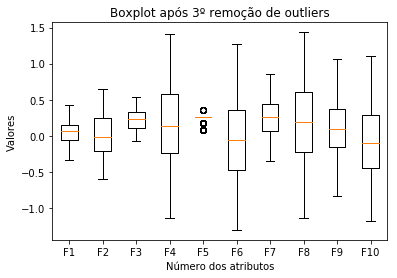

In [16]:
fig4, ax4 = plt.subplots()
ax4.set_title('Boxplot após 3º remoção de outliers')
ax4.set_xlabel("Número dos atributos")
ax4.set_ylabel("Valores")
ax4.boxplot(dataset[:, :10], labels=names[:10], showfliers=True)
plt.show()

Em seguida foi realizado o treinamente dessa nova base de dados, no modelo `model_3`.

Nesse modelo, pode-se observar que o "overfitting" ocorreu entre as épocas 2 e 3. Quando é realizado a analise da época 5, podemos ver que a acurácia está quase "saindo" do "overfitting", ou seja, a acurácia da validação está quase maior do que a do treinamento.

In [17]:
train_size = (len(dataset) * 80)//100
print(train_size)
X_3_train = dataset[:train_size, :10]
X_3_test = dataset[train_size:, :10]
Y_3_train = dataset[:train_size, 10]
Y_3_test = dataset[train_size:, 10]

3027


In [18]:
model_3 = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.softmax)
])
model_3.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_3_history = model_3.fit(X_3_train, Y_3_train, epochs=5, validation_split=0.25)

Train on 2270 samples, validate on 757 samples
Epoch 1/5
2270/2270 [==============================] - 1s 590us/step - loss: 1.1403 - acc: 0.5890 - val_loss: 0.8834 - val_acc: 0.6645
Epoch 2/5
2270/2270 [==============================] - 1s 364us/step - loss: 0.8174 - acc: 0.6696 - val_loss: 0.7650 - val_acc: 0.7028
Epoch 3/5
2270/2270 [==============================] - 1s 403us/step - loss: 0.7268 - acc: 0.6960 - val_loss: 0.7702 - val_acc: 0.6658
Epoch 4/5
2270/2270 [==============================] - 1s 456us/step - loss: 0.6810 - acc: 0.7128 - val_loss: 0.7226 - val_acc: 0.6882
Epoch 5/5
2270/2270 [==============================] - 1s 401us/step - loss: 0.6438 - acc: 0.7295 - val_loss: 0.6723 - val_acc: 0.7239


----------
### Model_4
E pela última vez foi realizado a 4º remoção de Outliers da base de dados.

Dessa vez sobraram apenas 2764 instâncias. Novamente, somente o atributo `F5` possui outliers.

In [19]:
mean = np.mean(dataset[:, :10], axis=0)
sd = np.std(dataset[:, :10], axis=0, dtype=np.float64)
for i in range(10):
    dataset = [x for x in dataset if (x[i] > mean[i] - 2 * sd[i])]
    dataset = [x for x in dataset if (x[i] < mean[i] + 2 * sd[i])]
    dataset = np.array(dataset)
    print(dataset.shape)

(3620, 11)
(3577, 11)
(3540, 11)
(3404, 11)
(3283, 11)
(3181, 11)
(3047, 11)
(2950, 11)
(2810, 11)
(2764, 11)


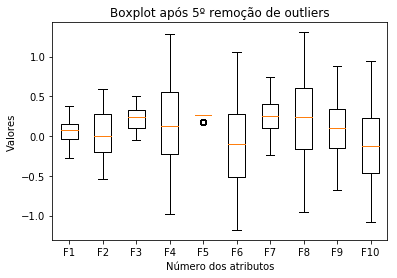

In [20]:
fig5, ax5 = plt.subplots()
ax5.set_title('Boxplot após 5º remoção de outliers')
ax5.set_xlabel("Número dos atributos")
ax5.set_ylabel("Valores")
ax5.boxplot(dataset[:, :10],labels=names[:10], showfliers=True)
plt.show()

Realizado o treinamento usando o modelo `model_4`, podemos observar que entre as épocas 3 e 4 ocorrou "overfitting", porém entre as épocas 4 e 5  o "overfitting" acabou.

In [21]:
train_size = (len(dataset) * 80)//100
print(train_size)
X_4_train = dataset[:train_size, :10]
X_4_test = dataset[train_size:, :10]
Y_4_train = dataset[:train_size, 10]
Y_4_test = dataset[train_size:, 10]

2211


In [22]:
model_4 = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.softmax)
])
model_4.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_4_history = model_4.fit(X_4_train, Y_4_train, epochs=5, validation_split=0.25)

Train on 1658 samples, validate on 553 samples
Epoch 1/5
1658/1658 [==============================] - 1s 641us/step - loss: 1.2286 - acc: 0.5633 - val_loss: 0.9497 - val_acc: 0.6221
Epoch 2/5
1658/1658 [==============================] - 1s 385us/step - loss: 0.9092 - acc: 0.6303 - val_loss: 0.8354 - val_acc: 0.6727
Epoch 3/5
1658/1658 [==============================] - 1s 407us/step - loss: 0.8008 - acc: 0.6689 - val_loss: 0.7761 - val_acc: 0.7016
Epoch 4/5
1658/1658 [==============================] - 1s 404us/step - loss: 0.7293 - acc: 0.7002 - val_loss: 0.7706 - val_acc: 0.6872
Epoch 5/5
1658/1658 [==============================] - 1s 384us/step - loss: 0.7062 - acc: 0.7159 - val_loss: 0.6966 - val_acc: 0.7251


-----
### Conclusão da análise dos outliers
Em seguida foi criado uma função para criar um gráfico para mostrar as "histórias" de cada um dos modelos. Usando a acurácia da validação e do treinamento de cada um dos modelos.

Nesse gráfico podemos observar todas as informações mencionadas anteriormente.

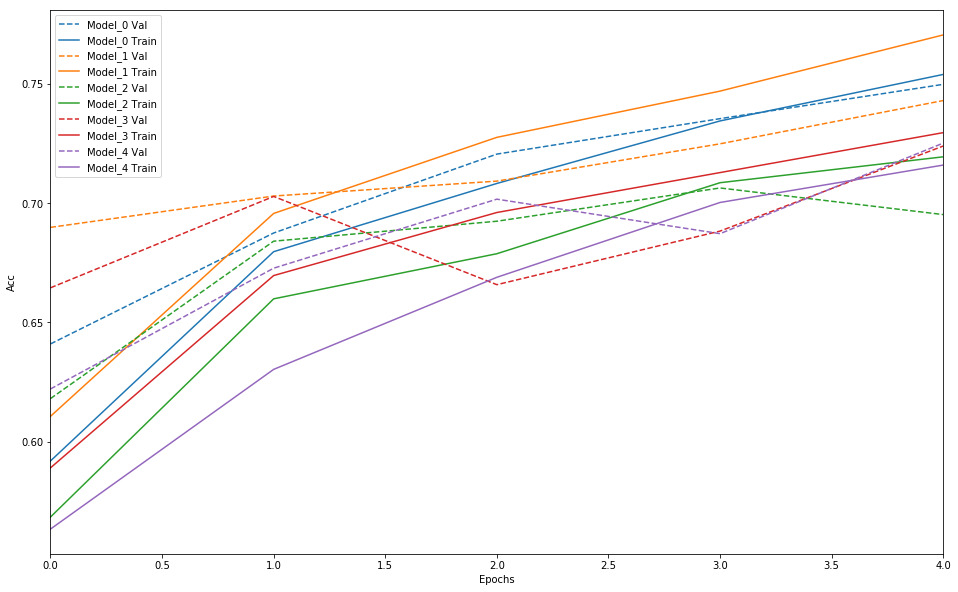

In [23]:
def plot_history(histories, key='acc'):
    plt.figure(figsize=(16,10))
    
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

        
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('model_0', model_0_history),
              ('model_1', model_1_history),
              ('model_2', model_2_history),
              ('model_3', model_3_history),
              ('model_4', model_4_history)])

Em seguida foi realizado o teste de cada um dos metodos com suas respectivas bases de dados.

Podemos observar que o modelo com maior acerto foi o modelo `model_1`.

In [24]:
test_0_loss, test_0_acc = model_0.evaluate(X_0_test, Y_0_test)
print('Acurácia do teste_0:', test_0_acc)

test_1_loss, test_1_acc = model_1.evaluate(X_1_test, Y_1_test)
print('Acurácia do teste_1:', test_1_acc)

test_2_loss, test_2_acc = model_2.evaluate(X_2_test, Y_2_test)
print('Acurácia do teste_2:', test_2_acc)

test_3_loss, test_3_acc = model_3.evaluate(X_3_test, Y_3_test)
print('Acurácia do teste_3:', test_3_acc)

test_4_loss, test_4_acc = model_4.evaluate(X_4_test, Y_4_test)
print('Acurácia do teste_4:', test_4_acc)

2086/2086 [==============================] - 0s 100us/step
Acurácia do teste_0: 0.7574304889169658
1599/1599 [==============================] - 0s 101us/step
Acurácia do teste_1: 0.7623514698176477
1076/1076 [==============================] - 0s 104us/step
Acurácia do teste_2: 0.7546468399271202
757/757 [==============================] - 0s 128us/step
Acurácia do teste_3: 0.7252311761659549
553/553 [==============================] - 0s 114us/step
Acurácia do teste_4: 0.7106690778654695


Então foi feito um gráfico para melhor visualização desses dados.

Apesar do resultado da acurácia do `test_1` ter sido o maior, nos próximos testes, para saber os atributos mais relevantes, usaremos a base de dados do `model_4`, pois essa é a base que apresenta menos outliers e nó final do treinamento foi oque apresentou a melhor diferença entre as acurácias do treinamento e da validação.

In [25]:
plot_test = [test_0_acc, test_1_acc, test_2_acc, test_3_acc, test_4_acc]

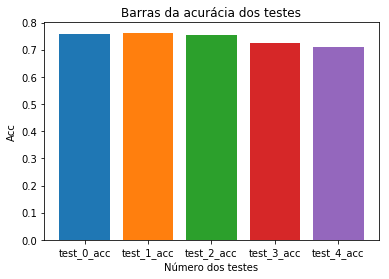

In [26]:
fig6, ax6 = plt.subplots()
ax6.set_title('Barras da acurácia dos testes')
ax6.set_xlabel("Número dos testes")
ax6.set_ylabel("Acc")
ax6.bar(range(5), plot_test, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], 
        tick_label=['test_0_acc', 'test_1_acc', 'test_2_acc', 'test_3_acc', 'test_4_acc'])
plt.show()

----------
## Análise dos atributos

Tendo a base de dados do `model_4` em mãos, analisaremos quais de seus atributos são os mais relevantes para a aprendizagem.

Primeiro, foi salvo os valores das predições do modelo `model_4`, com esses dados foi feito uma método para fazer os gráficos em barras, como podemos ver abaixo. 

Se o gráfico só apresenta uma barra colorida em azul, significa que ele acertou na classificação, caso o gráfico apresente uma barra vermelha significa que o modelo errou a classificação e uma barra azul aparecerá no mesmo gráfico para mostrar qual era a classificalçao certa.

In [27]:
predictions = model_4.predict(X_4_test)

In [28]:
def plot_value_array(i, predictions_array, true_Y):
    predictions_array, true_Y = predictions_array[i], true_Y[i]
    plt.grid(False)
    plt.xticks(range(12))
    plt.yticks([])
    thisplot = plt.bar(class_names, predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_Y].set_color('blue')

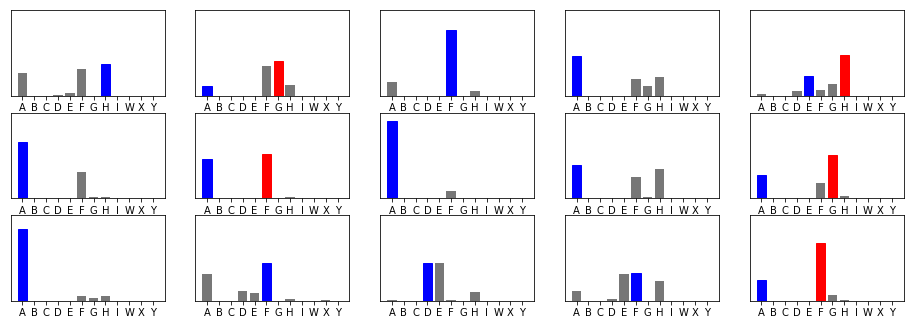

In [29]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols+4, 2*num_rows+1))
for i in range(num_images):
    plt.subplot(2*num_cols, num_rows, i+1)
    plot_value_array(i, predictions, Y_4_test)

----
Para tentar melhorar o modelo, será realizado a remoção de atributos baseado na correlação entrer eles, com o intuito de melhorar a acurácia da rede neural.

Com base no plot abaixo, podemos ver observar quais quais os atributos mais correlacionados entre si. Com isso, observa-se que o atributos `F9`, `F7`, `F6` possuem alta correlação com os outros atributos. Dessa forma será realizada a remoção dos mesmos.

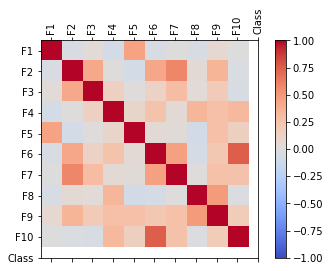

In [30]:
data = pandas.read_csv(url, names=names)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

Nessa parte do código foi feita a junção das partes de treinamento e de teste, para formar um dataset só

In [38]:
print(dataset.shape)
dataset = X_4_train
dataset = np.append(dataset, X_4_test, 0)
print(Y_4_train.shape)
Y =  np.append(Y_4_train, Y_4_test, 0)
print(Y.shape)
dataset = np.insert(dataset, 10, Y, 1)
print(dataset.shape)
names = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Class']

(2764, 11)
(2211,)
(2764,)
(2764, 11)


Como podemos ver abaixo foi feita a remoção dos atributos `F9`, `F7`, `F6` e foi feito o boxplot com os atributos restantes, para melhor visualização

In [39]:
dataset = np.delete(dataset,np.s_[5,6,8], 1)
print(dataset.shape)
names = np.delete(names, np.s_[5,6,8],0)
print(names)

(2764, 8)
['F1' 'F2' 'F3' 'F4' 'F5' 'F8' 'F10' 'Class']


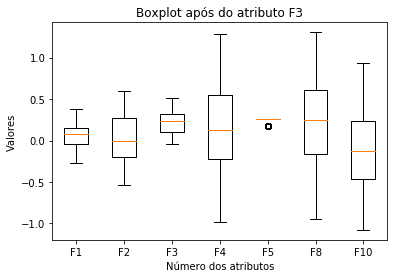

In [44]:
fig7, ax7 = plt.subplots()
ax7.set_title('Boxplot após do atributo F3')
ax7.set_xlabel("Número dos atributos")
ax7.set_ylabel("Valores")
ax7.boxplot(dataset[:, :7], labels=names[:7], showfliers=True)
plt.show()

----
### Conclusão

Em seguida foi feito o treinamento da rede neural, com os mesmos parâmetros dos modelos anteriores, porém desta vez a quantidade de épocas foi dobrada.

Podemos observar também que mesmo com os atributos mais correlacionais removidos, o desempenho da rede continua o mesmo, ocorrendo "overfitting" e acurácia no máximo é de 0.75.

Desta forma, o valor de acurácia esperado de perto de 95% nunca será obtido, pois mesmo alterando os paramêtros da rede, removendo outliers e removendo atributos, essa rede nunca alançará esse valor desejado.

In [45]:
train_size = (len(dataset) * 80)//100
print(train_size)
X_5_train = dataset[:train_size, :7]
X_5_test = dataset[train_size:, :7]
Y_5_train = dataset[:train_size, 7]
Y_5_test = dataset[train_size:, 7]

2211


In [46]:
model_5 = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(1024, activation=tf.nn.relu),
    keras.layers.Dense(12, activation=tf.nn.softmax)
])
model_5.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_5_history = model_5.fit(X_5_train, Y_5_train, epochs=10, validation_split=0.25)

Train on 1658 samples, validate on 553 samples
Epoch 1/10
1658/1658 [==============================] - 1s 739us/step - loss: 1.2713 - acc: 0.5410 - val_loss: 1.0444 - val_acc: 0.5787
Epoch 2/10
1658/1658 [==============================] - 1s 390us/step - loss: 0.9909 - acc: 0.5790 - val_loss: 0.9368 - val_acc: 0.6203
Epoch 3/10
1658/1658 [==============================] - 1s 378us/step - loss: 0.8887 - acc: 0.6267 - val_loss: 0.8985 - val_acc: 0.6438
Epoch 4/10
1658/1658 [==============================] - 1s 379us/step - loss: 0.8123 - acc: 0.6610 - val_loss: 0.8191 - val_acc: 0.6474
Epoch 5/10
1658/1658 [==============================] - 1s 376us/step - loss: 0.7799 - acc: 0.6556 - val_loss: 0.8734 - val_acc: 0.6293
Epoch 6/10
1658/1658 [==============================] - 1s 382us/step - loss: 0.7468 - acc: 0.6755 - val_loss: 0.7831 - val_acc: 0.6691
Epoch 7/10
1658/1658 [==============================] - 1s 390us/step - loss: 0.7158 - acc: 0.6978 - val_loss: 0.7701 - val_acc: 0.6781
E

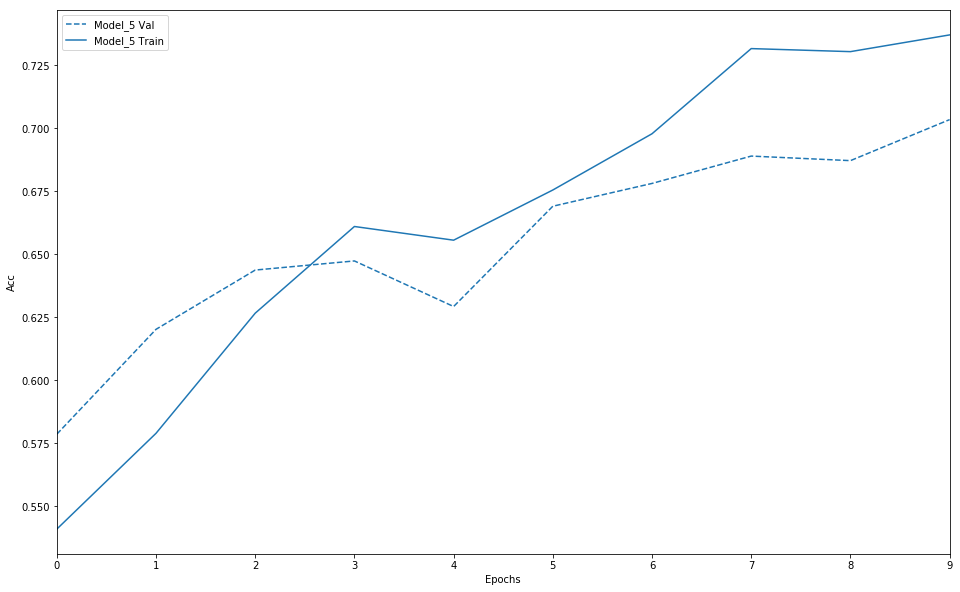

In [47]:
plot_history([('model_5', model_5_history)])